In [1]:
import re
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=pd.errors.ParserWarning)

import matplotlib.pyplot as plt
import seaborn as sns

### 1 Read data

In [2]:
occupations = {
    0: "other or not specified",
    1: "academic/educator",
    2: "artist",
    3: "clerical/admin",
    4: "college/grad student",
    5: "customer service",
    6: "doctor/health care",
    7: "executive/managerial",
    8: "farmer",
    9: "homemaker",
    10: "K-12 student",
    11: "lawyer",
    12: "programmer",
    13: "retired",
    14: "sales/marketing",
    15: "scientist",
    16: "self-employed",
    17: "technician/engineer",
    18: "tradesman/craftsman",
    19: "unemployed",
    20: "writer"
}

age_groups = {
    1: "Under 18",
    18: "18-24",
    25: "25-34",
    35: "35-44",
    45: "45-49",
    50: "50-55",
    56: "56+"
}

In [3]:
basic_path_to_dataset = "../../data/ml-1m/"

# read ratings
filename = "ratings.dat"
df_ratings = pd.read_csv(basic_path_to_dataset+filename, header=None, sep="::")
df_ratings.columns = ["UserID", "MovieID", "Rating", "Timestamp"]

# read users
filename = "users.dat"
df_users = pd.read_csv(basic_path_to_dataset+filename, header=None, sep="::")
df_users.columns = ["UserID", "Gender", "Age", "Occupation", "Zip-Code"]

# read movies
filename = "movies.dat"
df_movies = pd.read_csv(basic_path_to_dataset+filename, header=None, sep="::")
df_movies.columns = ["MovieID", "Title", "Genres"]

In [4]:
df_ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
df_users.head()

,UserID,Gender,Age,Occupation,Zip-Code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [6]:
df_movies["Genres"] = df_movies["Genres"].apply(lambda x: x.split('|'))
df_movies["Year"] = df_movies["Title"].apply(lambda x: re.search(r'\((\d{4})\)', x)[1]).astype(int)
df_movies["Title"] = df_movies["Title"].apply(lambda x: re.sub(r'\s*\(\d{4}\)\s*$', '', x))
df_movies.head()

,MovieID,Title,Genres,Year
0,1,Toy Story,"[Animation, Children's, Comedy]",1995
1,2,Jumanji,"[Adventure, Children's, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]",1995
3,4,Waiting to Exhale,"[Comedy, Drama]",1995
4,5,Father of the Bride Part II,[Comedy],1995


### 2 Simple EDA

### 2.1 Movies EDA

In [7]:
df_movies.head()

,MovieID,Title,Genres,Year
0,1,Toy Story,"[Animation, Children's, Comedy]",1995
1,2,Jumanji,"[Adventure, Children's, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]",1995
3,4,Waiting to Exhale,"[Comedy, Drama]",1995
4,5,Father of the Bride Part II,[Comedy],1995


In [8]:
df_movies["Year"].describe().astype(int)

count    3883
mean     1986
std        16
min      1919
25%      1982
50%      1994
75%      1997
max      2000
Name: Year, dtype: int64

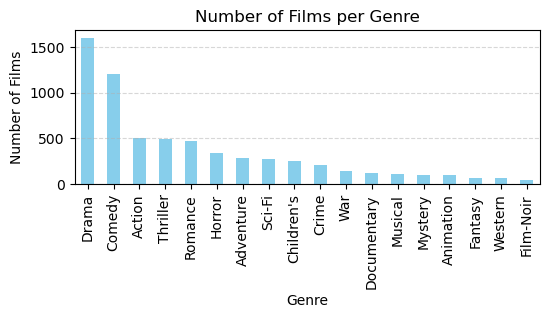

In [9]:
genre_counts = df_movies.explode('Genres')["Genres"].value_counts()

plt.figure(figsize=(6, 2)) 
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Films per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Films')
plt.xticks(rotation=90)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

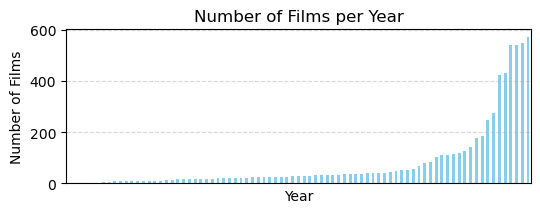

In [10]:
genre_counts = df_movies.explode('Genres')["Year"].value_counts(ascending=True)

plt.figure(figsize=(6, 2)) 
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Films per Year')
plt.xlabel('Year')
plt.ylabel('Number of Films')
plt.xticks(rotation=90)
plt.xticks([])
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

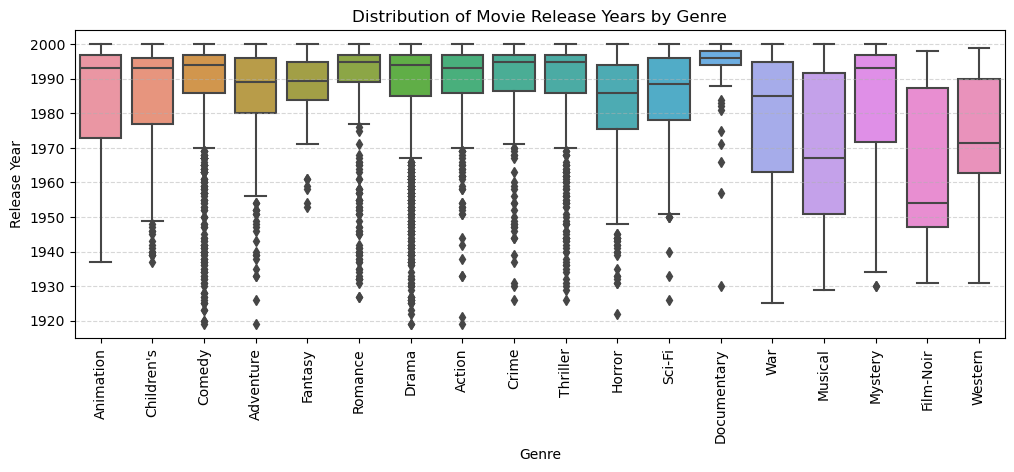

In [11]:
df_exploded = df_movies.explode('Genres')
plt.figure(figsize=(12, 4))
sns.boxplot(x='Genres', y='Year', data=df_exploded)
plt.title('Distribution of Movie Release Years by Genre')
plt.xlabel('Genre')
plt.ylabel('Release Year')
plt.xticks(rotation=90)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

In [12]:
one_hot_df = pd.get_dummies(df_movies["Genres"].explode())
one_hot_df = one_hot_df.groupby(one_hot_df.index).sum()
one_hot_df.head(1)

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
df_movies_onehot = pd.concat([df_movies, one_hot_df], axis=1, join="inner")
# df_movies_onehot.to_pickle("../../data/ml-1m-prepared/movies.pickle")

### 2.2 Users EDA

In [15]:
df_users.head(3)

,UserID,Gender,Age,Occupation,Zip-Code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117


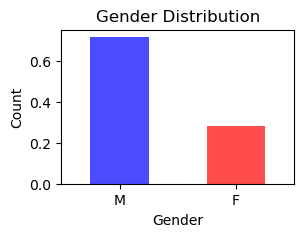

In [16]:
plt.figure(figsize=(3, 2))
df_users['Gender'].value_counts(normalize=True).plot(kind='bar',
                                                     color=['blue', 'red'],
                                                     alpha=0.7)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

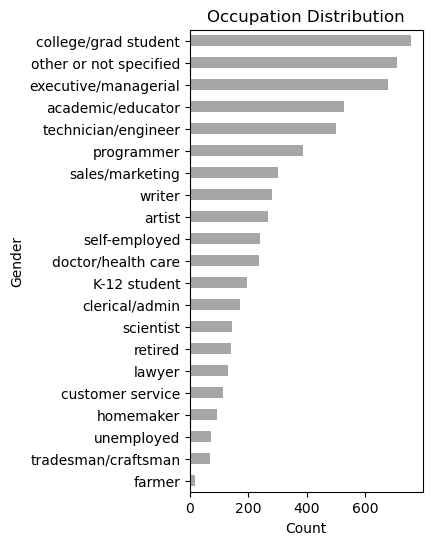

In [17]:
plt.figure(figsize=(3, 6))
df_users["Occupation"].map(occupations).value_counts(normalize=False).\
    sort_values(ascending=True).plot(kind='barh', alpha=0.7, color='gray')
plt.title('Occupation Distribution')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.xticks(rotation=0)
plt.show()

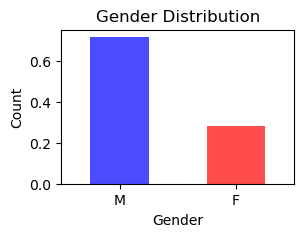

In [18]:
plt.figure(figsize=(3, 2))
df_users['Gender'].value_counts(normalize=True).plot(kind='bar',
                                                     color=['blue', 'red'],
                                                     alpha=0.7)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Process ZIP and add states:

In [19]:
from pyzipcode import ZipCodeDatabase
zcdb = ZipCodeDatabase()

def get_location_info(zip_code):
    try:
        result = zcdb[zip_code]
        return result.state, result.latitude, result.longitude
    except:
        return None, None, None
    
df_users[['State', 'Latitude', 'Longitude']] = df_users['Zip-Code'].apply(lambda x: pd.Series(get_location_info(x)))

In [20]:
df_users.head(3)

,UserID,Gender,Age,Occupation,Zip-Code,State,Latitude,Longitude
0,1,F,1,10,48067,MI,42.488735,-83.13752
1,2,M,56,16,70072,LA,29.869283,-90.10933
2,3,M,25,15,55117,MN,44.989065,-93.10666


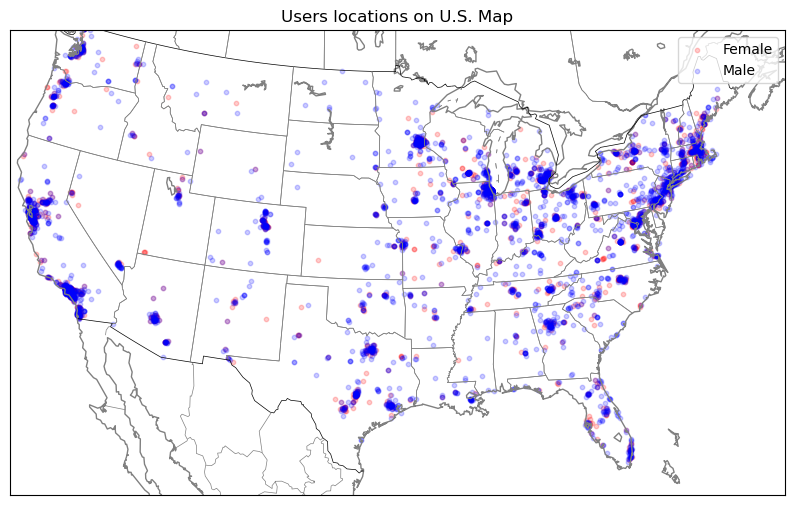

In [21]:
from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(10, 8))
# Set up Basemap
m = Basemap(projection='lcc', resolution='l',
            lat_0=38, lon_0=-95,  # Central coordinates
            width=5E6, height=3E6)  # Adjusted dimensions for better coverage

m.drawcoastlines(color='gray')
m.drawcountries(color='black')
m.drawstates(color='gray')

# Create subsets for male and female
df_female = df_users[df_users['Gender'] == 'F']
df_male = df_users[df_users['Gender'] == 'M']

# Plot data points
for df, color, sex in zip([df_female, df_male],
                          ['red', 'blue'], ['Female', 'Male']):
    x, y = m(df['Longitude'].values, df['Latitude'].values)
    m.scatter(x, y, color=color, marker='o',
            s=10, alpha=0.2, label=sex)

# Add legend and title
plt.legend(loc='best')
plt.title('Users locations on U.S. Map')

# Show the plot
plt.show()

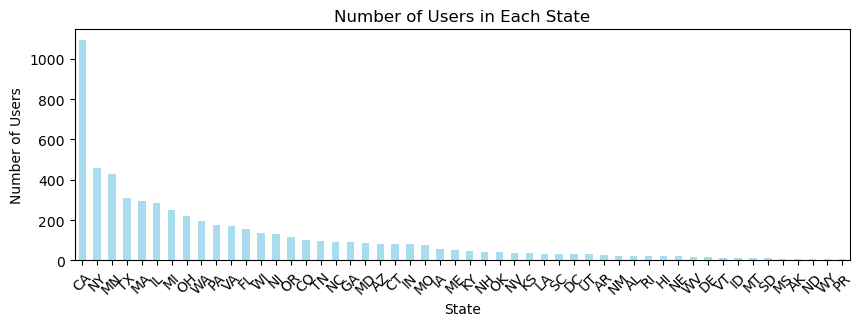

In [22]:
# Plot the number of users in each state
state_counts = df_users['State'].value_counts()

plt.figure(figsize=(10, 3))
state_counts.plot(kind='bar', alpha=0.7, color='skyblue')
plt.xticks(rotation=45)
plt.xlabel('State')
plt.ylabel('Number of Users')
plt.title('Number of Users in Each State')
plt.show()

In [23]:
# df_users.to_pickle("../../data/ml-1m-prepared/users.pickle")

### 2.3 Ratings

In [24]:
df_ratings.head(3)

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968


In [25]:
df_ratings["Datetime"] = pd.to_datetime(df_ratings['Timestamp'], unit='s')
df_ratings["Date"] = df_ratings["Datetime"].dt.date
df_ratings.head(3)

,UserID,MovieID,Rating,Timestamp,Datetime,Date
0,1,1193,5,978300760,2000-12-31 22:12:40,2000-12-31
1,1,661,3,978302109,2000-12-31 22:35:09,2000-12-31
2,1,914,3,978301968,2000-12-31 22:32:48,2000-12-31


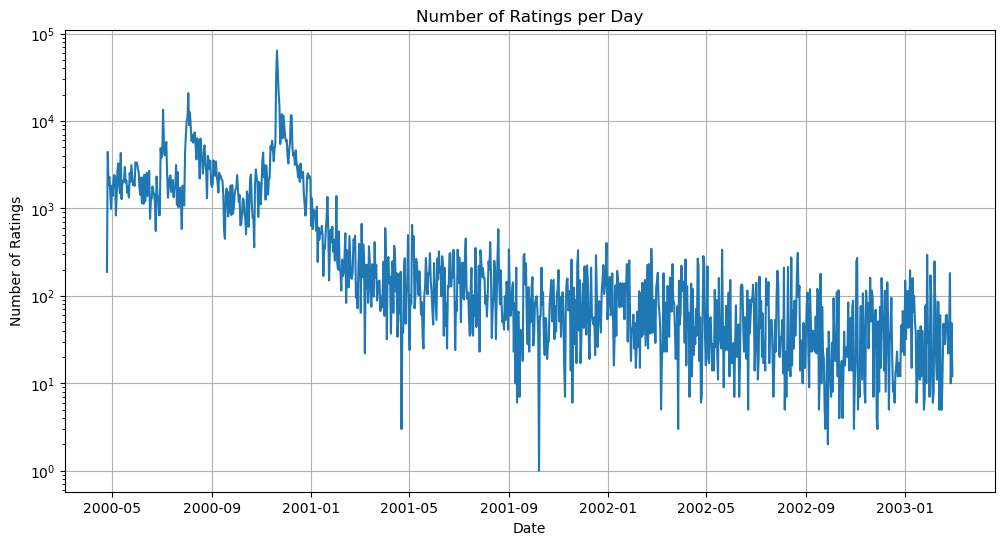

In [26]:
# Group by date and count the number of ratings
ratings_per_day = df_ratings.groupby('Date').size().sort_index()

# Plot the number of ratings per day
plt.figure(figsize=(12, 6))
ratings_per_day.plot(kind='line', logy=True)
plt.xlabel('Date')
plt.ylabel('Number of Ratings')
plt.title('Number of Ratings per Day')
plt.grid(True)
plt.show()

Process Movies:

In [27]:
# df_ratings[["MovieID", "Rating"]].groupby("MovieID").mean()
rating_stats = df_ratings.groupby("MovieID")["Rating"].agg(["mean", "count"]).reset_index()
rating_stats

,MovieID,mean,count
0,1,4.146846,2077
1,2,3.201141,701
2,3,3.016736,478
3,4,2.729412,170
4,5,3.006757,296
...,...,...,...
3701,3948,3.635731,862
3702,3949,4.115132,304
3703,3950,3.666667,54
3704,3951,3.900000,40


In [28]:
movies_with_ratings = rating_stats.merge(df_movies, on="MovieID")
movies_with_ratings.shape
movies_with_ratings.head(1)

,MovieID,mean,count,Title,Genres,Year
0,1,4.146846,2077,Toy Story,"[Animation, Children's, Comedy]",1995


Text(0, 0.5, 'Count')

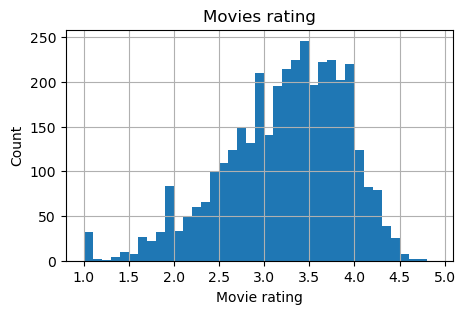

In [29]:
plt.figure(figsize=(5, 3))
movies_with_ratings["mean"].hist(bins=np.arange(1, 5, 0.1))
plt.title("Movies rating")
plt.xlabel("Movie rating")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

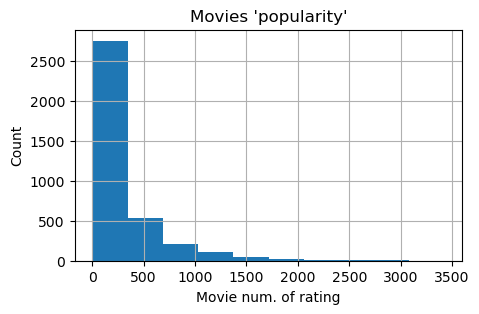

In [30]:
plt.figure(figsize=(5, 3))
movies_with_ratings["count"].hist()
plt.title("Movies 'popularity'")
plt.xlabel("Movie num. of rating")
plt.ylabel("Count")

In [31]:
movies_with_ratings = movies_with_ratings[movies_with_ratings["count"]>10]
movies_with_ratings.shape

(3233, 6)

In [32]:
display(movies_with_ratings.sort_values("mean", ascending=False)[:10])

,MovieID,mean,count,Title,Genres,Year
2698,2905,4.608696,69,Sanjuro,"[Action, Adventure]",1962
1839,2019,4.560510,628,Seven Samurai (The Magnificent Seven) (Shichin...,"[Action, Drama]",1954
309,318,4.554558,2227,"Shawshank Redemption, The",[Drama],1994
802,858,4.524966,2223,"Godfather, The","[Action, Crime, Drama]",1972
708,745,4.520548,657,"Close Shave, A","[Animation, Comedy, Thriller]",1995
49,50,4.517106,1783,"Usual Suspects, The","[Crime, Thriller]",1995
513,527,4.510417,2304,Schindler's List,"[Drama, War]",1993
1066,1148,4.507937,882,"Wrong Trousers, The","[Animation, Comedy]",1993
861,922,4.491489,470,Sunset Blvd. (a.k.a. Sunset Boulevard),[Film-Noir],1950
1108,1198,4.477725,2514,Raiders of the Lost Ark,"[Action, Adventure]",1981


In [33]:
display(movies_with_ratings.sort_values("count", ascending=False)[:10])

,MovieID,mean,count,Title,Genres,Year
2651,2858,4.317386,3428,American Beauty,"[Comedy, Drama]",1999
253,260,4.453694,2991,Star Wars: Episode IV - A New Hope,"[Action, Adventure, Fantasy, Sci-Fi]",1977
1106,1196,4.292977,2990,Star Wars: Episode V - The Empire Strikes Back,"[Action, Adventure, Drama, Sci-Fi, War]",1980
1120,1210,4.022893,2883,Star Wars: Episode VI - Return of the Jedi,"[Action, Adventure, Romance, Sci-Fi, War]",1983
466,480,3.763847,2672,Jurassic Park,"[Action, Adventure, Sci-Fi]",1993
1848,2028,4.337354,2653,Saving Private Ryan,"[Action, Drama, War]",1998
575,589,4.058513,2649,Terminator 2: Judgment Day,"[Action, Sci-Fi, Thriller]",1991
2374,2571,4.315830,2590,"Matrix, The","[Action, Sci-Fi, Thriller]",1999
1178,1270,3.990321,2583,Back to the Future,"[Comedy, Sci-Fi]",1985
579,593,4.351823,2578,"Silence of the Lambs, The","[Drama, Thriller]",1991


Process Users:

In [36]:
rating_stats = df_ratings.groupby("UserID")["Rating"].agg(["mean", "count"]).reset_index()

3.702704866999724


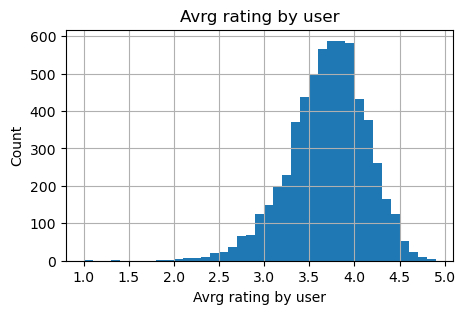

In [52]:
plt.figure(figsize=(5, 3))
rating_stats["mean"].hist(bins=np.arange(1, 5, 0.1))
plt.title("Avrg rating by user")
plt.xlabel("Avrg rating by user")
plt.ylabel("Count")
print(rating_stats["mean"].mean())

165.5975165562914


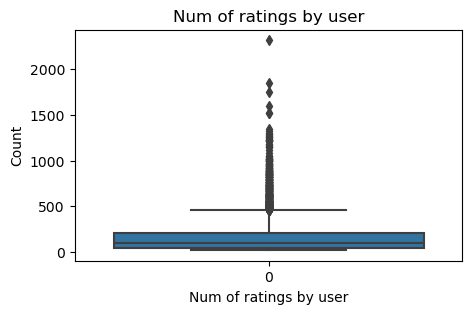

In [51]:
plt.figure(figsize=(5, 3))
sns.boxplot(rating_stats["count"])
plt.title("Num of ratings by user")
plt.xlabel("Num of ratings by user")
plt.ylabel("Count")
print(rating_stats["count"].mean())

In [55]:
rating_stats.sort_values("mean")

,UserID,mean,count
3597,3598,1.015385,65
4485,4486,1.058824,51
2743,2744,1.304348,138
4538,4539,1.815126,119
5849,5850,1.844828,58
...,...,...,...
445,446,4.843137,51
3901,3902,4.890909,165
3323,3324,4.904762,21
2338,2339,4.956522,23


In [57]:
df_users[df_users['UserID']==3598]

,UserID,Gender,Age,Occupation,Zip-Code,State,Latitude,Longitude
3597,3598,M,56,1,90210,CA,34.088808,-118.40612


In [58]:
df_users[df_users['UserID']==4486]

,UserID,Gender,Age,Occupation,Zip-Code,State,Latitude,Longitude
4485,4486,M,35,8,98674,WA,45.928662,-122.70284


In [34]:
# df_ratings.to_pickle("../../data/ml-1m-prepared/ratings.pickle")